# Dimensionality Reduction with Regression

In [1]:
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Create Data

In [32]:
# create noisy helix
amplitude_a = 3
scale_a = 4
amplitude_b = 2
scale_b = 4
num_points = 1000
t_time = np.linspace(0, np.pi, num_points)
x_data = amplitude_a * np.cos(scale_a * t_time)
y_data = amplitude_b * np.sin(scale_b * t_time)
z_data = amplitude_b * t_time

helix_data = np.vstack((x_data, y_data, z_data)).T
n_samples, d_dimensions = helix_data.shape
# add noise
random_state = 123
generator = check_random_state(random_state)
noise_scale = np.linspace(0.1, 1.8, len(t_time))


helix_data += (generator.randn(n_samples, d_dimensions).T * noise_scale).T

In [30]:

scale = noise_scale
noise = generator.randn(n_samples, d_dimensions)

print(scale.shape)
print(noise.T.shape)

temp = scale * noise.T

print(temp.shape)

(1000,)
(3, 1000)
(3, 1000)


### Figure

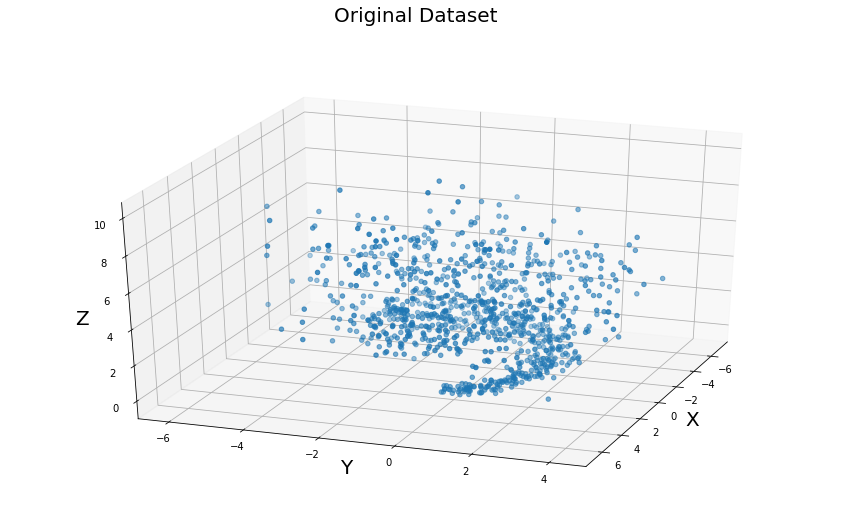

In [33]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Original Dataset", fontsize=20)

ax = fig.add_subplot(111, projection='3d')

ax.scatter(helix_data[:, 0], 
           helix_data[:, 1], 
           helix_data[:, 2])
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

ax.view_init(30, 20)
plt.show()

## Training

In [40]:
cross_train = True
trans_train = 'PCA' # PCA, ICA, MCV

# extract the mean of the data
data_mean = np.mean(helix_data, axis=0)
helix_data_mean = helix_data - data_mean

# PCA on the data 
cov_data = np.cov(helix_data_mean)            # covariance matrix
[eigvals, eigvecs] = np.linalg.eig(cov_data)  # eigenvalues


(1000,)
(1000, 1000)


In [44]:
print(eigvecs.shape)
print(eigvals.shape)
indices = eigvals.argsort()
eigvals_sorted = eigvals[indices]
eigvecs_sorted = eigvecs[:, indices]

(1000, 1000)
(1000,)
